### Stage 1:
Perform statistical parsing/tagging on a document in JSON format

INPUTS: JSON doc for the text input  
OUTPUT: JSON format `ParsedGraf(id, sha1, graf)`

In [6]:
import pytextrank
import sys

path_stage0 = "dat/mih.json"
path_stage1 = "o1.json"

with open(path_stage1, 'w') as f:
    for graf in pytextrank.parse_doc(pytextrank.json_iter(path_stage0)):
        f.write("%s\n" % pytextrank.pretty_print(graf._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(graf))

["777", "7b982e54fa330a6854a0ed5397d49223fdc70645", [[1, "Compatibility", "compatibility", "NN", 1, 0], [0, "of", "of", "IN", 0, 1], [2, "systems", "system", "NNS", 1, 2], [0, "of", "of", "IN", 0, 3], [3, "linear", "linear", "JJ", 1, 4], [4, "constraints", "constraint", "NNS", 1, 5], [0, "over", "over", "IN", 0, 6], [0, "the", "the", "DT", 0, 7], [5, "set", "set", "NN", 1, 8], [0, "of", "of", "IN", 0, 9], [6, "natural", "natural", "JJ", 1, 10], [7, "numbers", "number", "NNS", 1, 11], [0, ".", ".", ".", 0, 12]]]
["777", "dfa572a4a2d2c0fd9254172d95b574b3f6067f63", [[8, "Criteria", "criteria", "NNP", 1, 13], [0, "of", "of", "IN", 0, 14], [1, "compatibility", "compatibility", "NN", 1, 15], [0, "of", "of", "IN", 0, 16], [0, "a", "a", "DT", 0, 17], [2, "system", "system", "NN", 1, 18], [0, "of", "of", "IN", 0, 19], [3, "linear", "linear", "NN", 1, 20], [9, "Diophantine", "diophantine", "NNP", 1, 21], [10, "equations", "equation", "NNS", 1, 22], [0, ",", ",", ".", 0, 23], [11, "strict", "stri

### Stage 2:
Collect and normalize the key phrases from a parsed document

INPUTS: `<stage1>`  
OUTPUT: JSON format `RankedLexeme(text, rank, ids, pos)`

In [7]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

graph, ranks = pytextrank.text_rank(path_stage1)
pytextrank.render_ranks(graph, ranks)

with open(path_stage2, 'w') as f:
    for rl in pytextrank.normalize_key_phrases(path_stage1, ranks):
        f.write("%s\n" % pytextrank.pretty_print(rl._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(rl))

["types systems", 0.12580188866089437, [24, 2], "np", 1]
["mixed types", 0.08891323868549979, [33, 24], "np", 1]
["minimal set", 0.07071383636856185, [19, 5], "np", 1]
["systems", 0.06290094433044718, [2], "np", 1]
["strict inequations", 0.05170005955659954, [11, 12], "np", 1]
["considered", 0.04535170212808048, [15], "vbn", 2]
["types", 0.044456619342749894, [24], "nns", 3]
["natural numbers", 0.035680974352343166, [6, 7], "np", 1]
["set", 0.035356918184280925, [5], "nn", 4]
["minimal generating sets", 0.035356918184280925, [19, 23, 5], "np", 1]
["solutions", 0.03516111710876194, [20], "nns", 3]
["linear diophantine equations", 0.031027760122128312, [3, 9, 10], "np", 1]
["diophantine", 0.027937472512821634, [9], "np", 1]
["linear constraints", 0.027937472512821634, [3, 4], "np", 1]
["solving", 0.027584454272763282, [32], "vbg", 1]
["nonstrict inequations", 0.02585002977829977, [13, 12], "np", 1]
["inequations", 0.02585002977829977, [12], "nns", 2]
["numbers", 0.017840487176171583, [7]

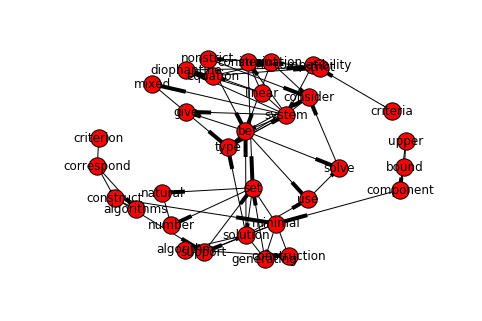

In [8]:
import networkx as nx
import pylab as plt

nx.draw(graph, with_labels=True) 
plt.show() 

### Stage 3:
Calculate a significance weight for each sentence, using MinHash to approximate a Jaccard distance from key phrases determined by TextRank

INPUTS: `<stage1> <stage2>`  
OUTPUT: JSON format `SummarySent(dist, idx, text)`

In [9]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"
path_stage3 = "o3.json"

kernel = pytextrank.rank_kernel(path_stage2)

with open(path_stage3, 'w') as f:
    for s in pytextrank.top_sentences(kernel, path_stage1):
        f.write(pytextrank.pretty_print(s._asdict()))
        f.write("\n")
        # to view output in this notebook
        print(pytextrank.pretty_print(s._asdict()))

{"dist": 0.06495815088405221, "idx": 0, "text": "Compatibility of systems of linear constraints over the set of natural numbers ."}
{"dist": 0.059241314822135904, "idx": 2, "text": "Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given ."}
{"dist": 0.05775806902914533, "idx": 3, "text": "These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types ."}
{"dist": 0.05064812344999486, "idx": 1, "text": "Criteria of compatibility of a system of linear Diophantine equations , strict inequations , and nonstrict inequations are considered ."}


### Stage 4:
Summarize a document based on most significant sentences and key phrases

INPUTS: `<stage2> <stage3>`  
OUTPUT: Markdown format

In [10]:
path_stage2 = "o2.json"
path_stage3 = "o3.json"

phrases = ", ".join(set([p for p in pytextrank.limit_keyphrases(path_stage2, phrase_limit=12)]))
sent_iter = sorted(pytextrank.limit_sentences(path_stage3, word_limit=150), key=lambda x: x[1])
s = []

for sent_text, idx in sent_iter:
    s.append(pytextrank.make_sentence(sent_text))

graf_text = " ".join(s)
print("**excerpts:** %s\n\n**keywords:** %s" % (graf_text, phrases,))

**excerpts:** Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types.

**keywords:** natural numbers, systems, set, types, types systems, diophantine, linear constraints, linear diophantine equations, mixed types, solutions, strict inequations, minimal generating sets, minimal set
